### Building a Multiple linear Regression Model to predict the demand of Shared bike with in a region 
- BoomBikes, a US-based bike-sharing provider, has faced significant revenue losses due to the COVID-19 pandemic. To address these challenges and prepare for a post-lockdown recovery, the company aims to create a strategic business plan to accelerate revenue growth as the economy improves. They are particularly interested in understanding the factors influencing the demand for shared bikes in the American market after quarantine restrictions end.

 - BoomBikes has hired a consulting firm to analyze a dataset that includes daily bike demand data, considering various factors such as weather conditions and user behavior. The company seeks to identify which variables significantly impact bike demand and how well these factors explain the fluctuations in usage. The insights gained from this analysis will help BoomBikes better cater to customer needs, differentiate itself from competitors, and achieve profitability.

### ___Step 1 : Importing the required Library___


In [3]:
# For Data managment and Adjustment
import numpy as np
import pandas as pd

# For Data Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# For Data and Time 
from datetime import datetime as dt 

# To Prevent copy error for being seen 
import warnings
warnings.filterwarnings('ignore')

# For building a Model and Predictions
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, PolynomialFeatures
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

### ___Step 2 : Reading Data___

In [5]:
bikes = pd.read_csv('day.csv', low_memory = True, )

In [6]:
bikes.head(3)

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349


In [7]:
bikes[['temp','atemp','hum','windspeed']] = bikes[['temp','atemp','hum','windspeed']].round(2)

In [8]:
bikes.shape

(730, 16)

In [9]:
bikes.head(3)

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.11,18.18,80.58,10.75,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.90,17.69,69.61,16.65,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.05,9.47,43.73,16.64,120,1229,1349


In [10]:
bikes.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319329,23.726384,62.765082,12.763699,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506827,8.150247,14.237634,5.195640,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.420000,3.950000,0.000000,1.500000,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.810000,16.892500,52.000000,9.040000,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465000,24.370000,62.625000,12.130000,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.882500,30.445000,72.990000,15.627500,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.330000,42.040000,97.250000,34.000000,3410.000000,6946.000000,8714.000000


In [11]:
bikes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [12]:
# Unique values present in the DataFrame
bikes.nunique()

instant       730
dteday        730
season          4
yr              2
mnth           12
holiday         2
weekday         7
workingday      2
weathersit      3
temp          489
atemp         521
hum           589
windspeed     426
casual        605
registered    678
cnt           695
dtype: int64

In [13]:
# Having a list of column names present in the dataframe for easy access later on.
df_columns = bikes.columns.tolist()
print(df_columns)

['instant', 'dteday', 'season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed', 'casual', 'registered', 'cnt']


#### ___Step 2.1 : Segmenting the data for easy Handeling___

___Removing Date Time Variables and instant variable___

In [16]:
df = bikes.copy()

In [17]:
# Remove unnecessary instant column
df = df.drop(['instant', 'dteday'], axis=1)

In [18]:
df.head(3)

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,0,1,0,6,0,2,14.11,18.18,80.58,10.75,331,654,985
1,1,0,1,0,0,0,2,14.90,17.69,69.61,16.65,131,670,801
2,1,0,1,0,1,1,1,8.05,9.47,43.73,16.64,120,1229,1349


___Categorical Variables___

In [20]:
# Converting the object category into a categorical dtype.
cat_columns = ['mnth','season', 'yr', 'holiday', 'weekday','workingday', 'weathersit']
df[cat_columns] = df[cat_columns].astype('category')
df[cat_columns].nunique()

mnth          12
season         4
yr             2
holiday        2
weekday        7
workingday     2
weathersit     3
dtype: int64

- The columns (yr, holiday, workingday) present in the Dataframe which has only two variable 0 or 1 represneting Yes or No will not be considered for Dummy variable. 

___Numerical Variables___

In [23]:
# Writing a function to Converting the object category into a numerical dtype.
def get_numeric_columns(df):
    """
    Returns a list of column names with float64 or int64 data types from the given DataFrame.

    Parameters:
    df (pd.DataFrame): The input DataFrame.

    Returns:
    list: A list of column names with numeric data types.
    """
    return df.select_dtypes(include=['float64', 'int64']).columns.tolist()

In [24]:
num_columns = get_numeric_columns(df)
num_columns

['temp', 'atemp', 'hum', 'windspeed', 'casual', 'registered', 'cnt']

### ___Step 3: Vizualizing the Data___

- Visualization of numerical values using a scatter plot to identify a linear pattern.

In [27]:
df.head(3)

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,0,1,0,6,0,2,14.11,18.18,80.58,10.75,331,654,985
1,1,0,1,0,0,0,2,14.90,17.69,69.61,16.65,131,670,801
2,1,0,1,0,1,1,1,8.05,9.47,43.73,16.64,120,1229,1349


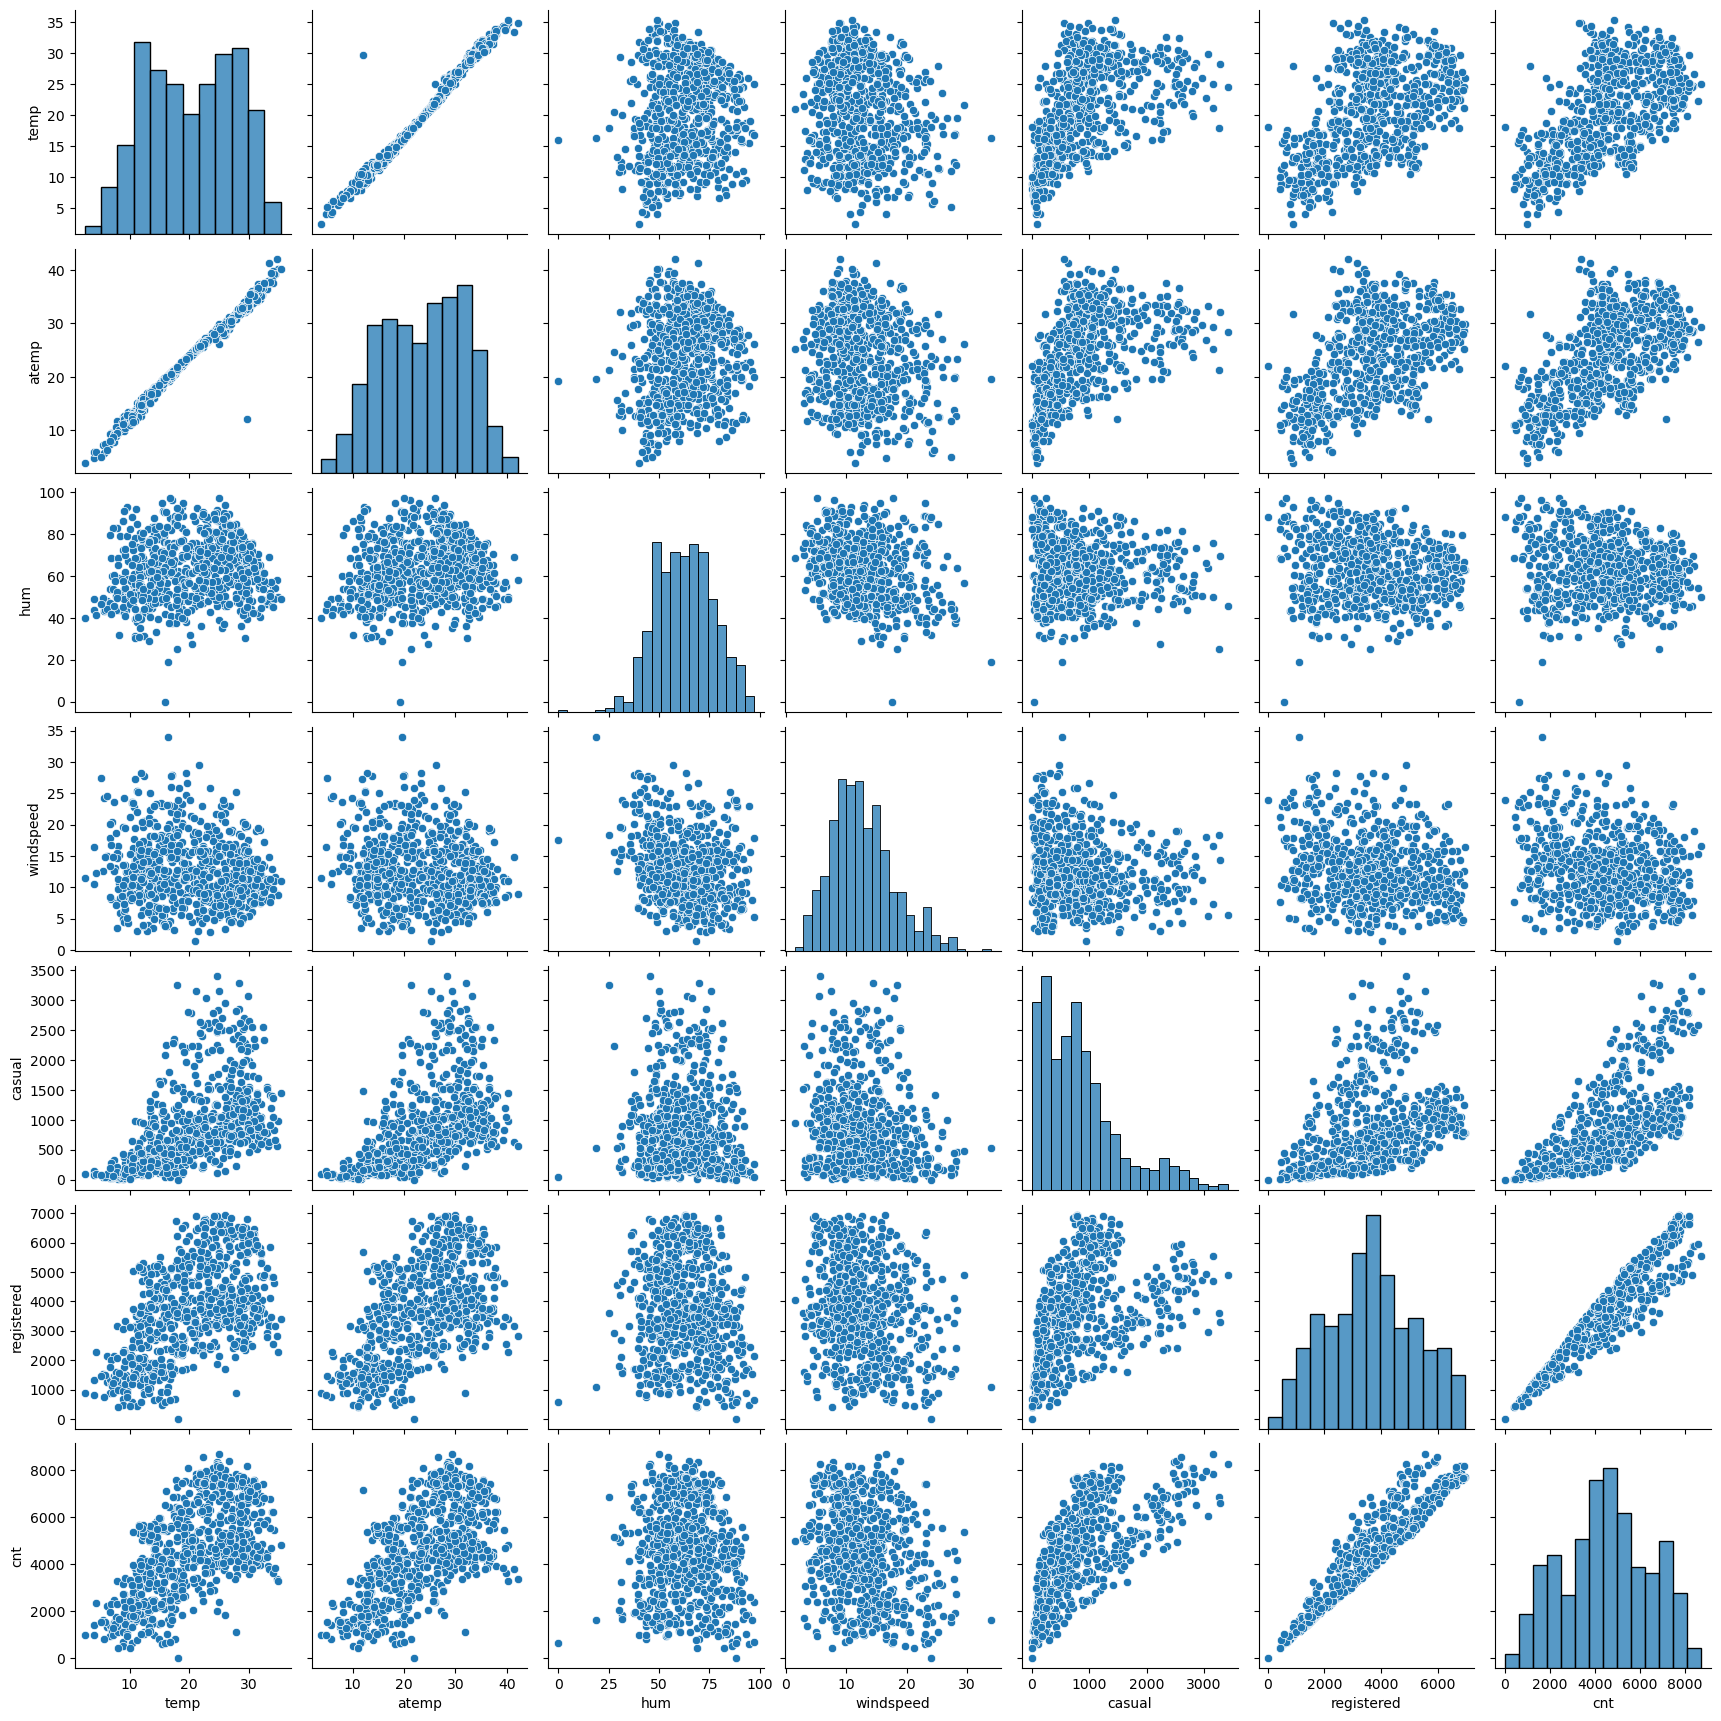

In [28]:
sns.pairplot(df)
plt.show()

In [29]:
df['Total_cnt'] = df['casual']+df['registered']

In [30]:
df.drop(['casual', 'registered'], axis=1, inplace=True)

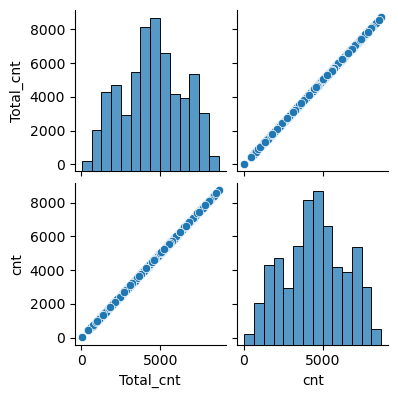

In [31]:
sns.pairplot(df[['Total_cnt', 'cnt']], height = 2)
plt.show()

In [32]:
df.drop(['Total_cnt'], axis=1, inplace=True)

In [33]:
# 3. Polynomial Features & Interaction Terms
poly = PolynomialFeatures(degree=2, interaction_only=True, include_bias=False)
poly_features = poly.fit_transform(df[['temp', 'atemp', 'hum', 'windspeed']])
poly_df = pd.DataFrame(poly_features, columns=poly.get_feature_names_out(['temp', 'atemp', 'hum', 'windspeed']))

In [34]:
# Concatenating polynomial features with original data
df = pd.concat([df, poly_df], axis=1)

df.head()


,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,...,temp,atemp,hum,windspeed,temp atemp,temp hum,temp windspeed,atemp hum,atemp windspeed,hum windspeed
0,1,0,1,0,6,0,2,14.11,18.18,80.58,...,14.11,18.18,80.58,10.75,256.5198,1136.9838,151.6825,1464.9444,195.4350,866.2350
1,1,0,1,0,0,0,2,14.90,17.69,69.61,...,14.90,17.69,69.61,16.65,263.5810,1037.1890,248.0850,1231.4009,294.5385,1159.0065
2,1,0,1,0,1,1,1,8.05,9.47,43.73,...,8.05,9.47,43.73,16.64,76.2335,352.0265,133.9520,414.1231,157.5808,727.6672
3,1,0,1,0,2,1,1,8.20,10.61,59.04,...,8.20,10.61,59.04,10.74,87.0020,484.1280,88.0680,626.4144,113.9514,634.0896
4,1,0,1,0,3,1,1,9.31,11.46,43.70,...,9.31,11.46,43.70,12.52,106.6926,406.8470,116.5612,500.8020,143.4792,547.1240


In [35]:
df = df.loc[:, ~df.columns.duplicated()]

    - Both humidity and wind speed do not exhibit a strong linear relationship. 
    - Although we can fit a line, the predictive power may not be very strong.
    - Temp and atemp are the same 

- For Categorical Variables Boxplot

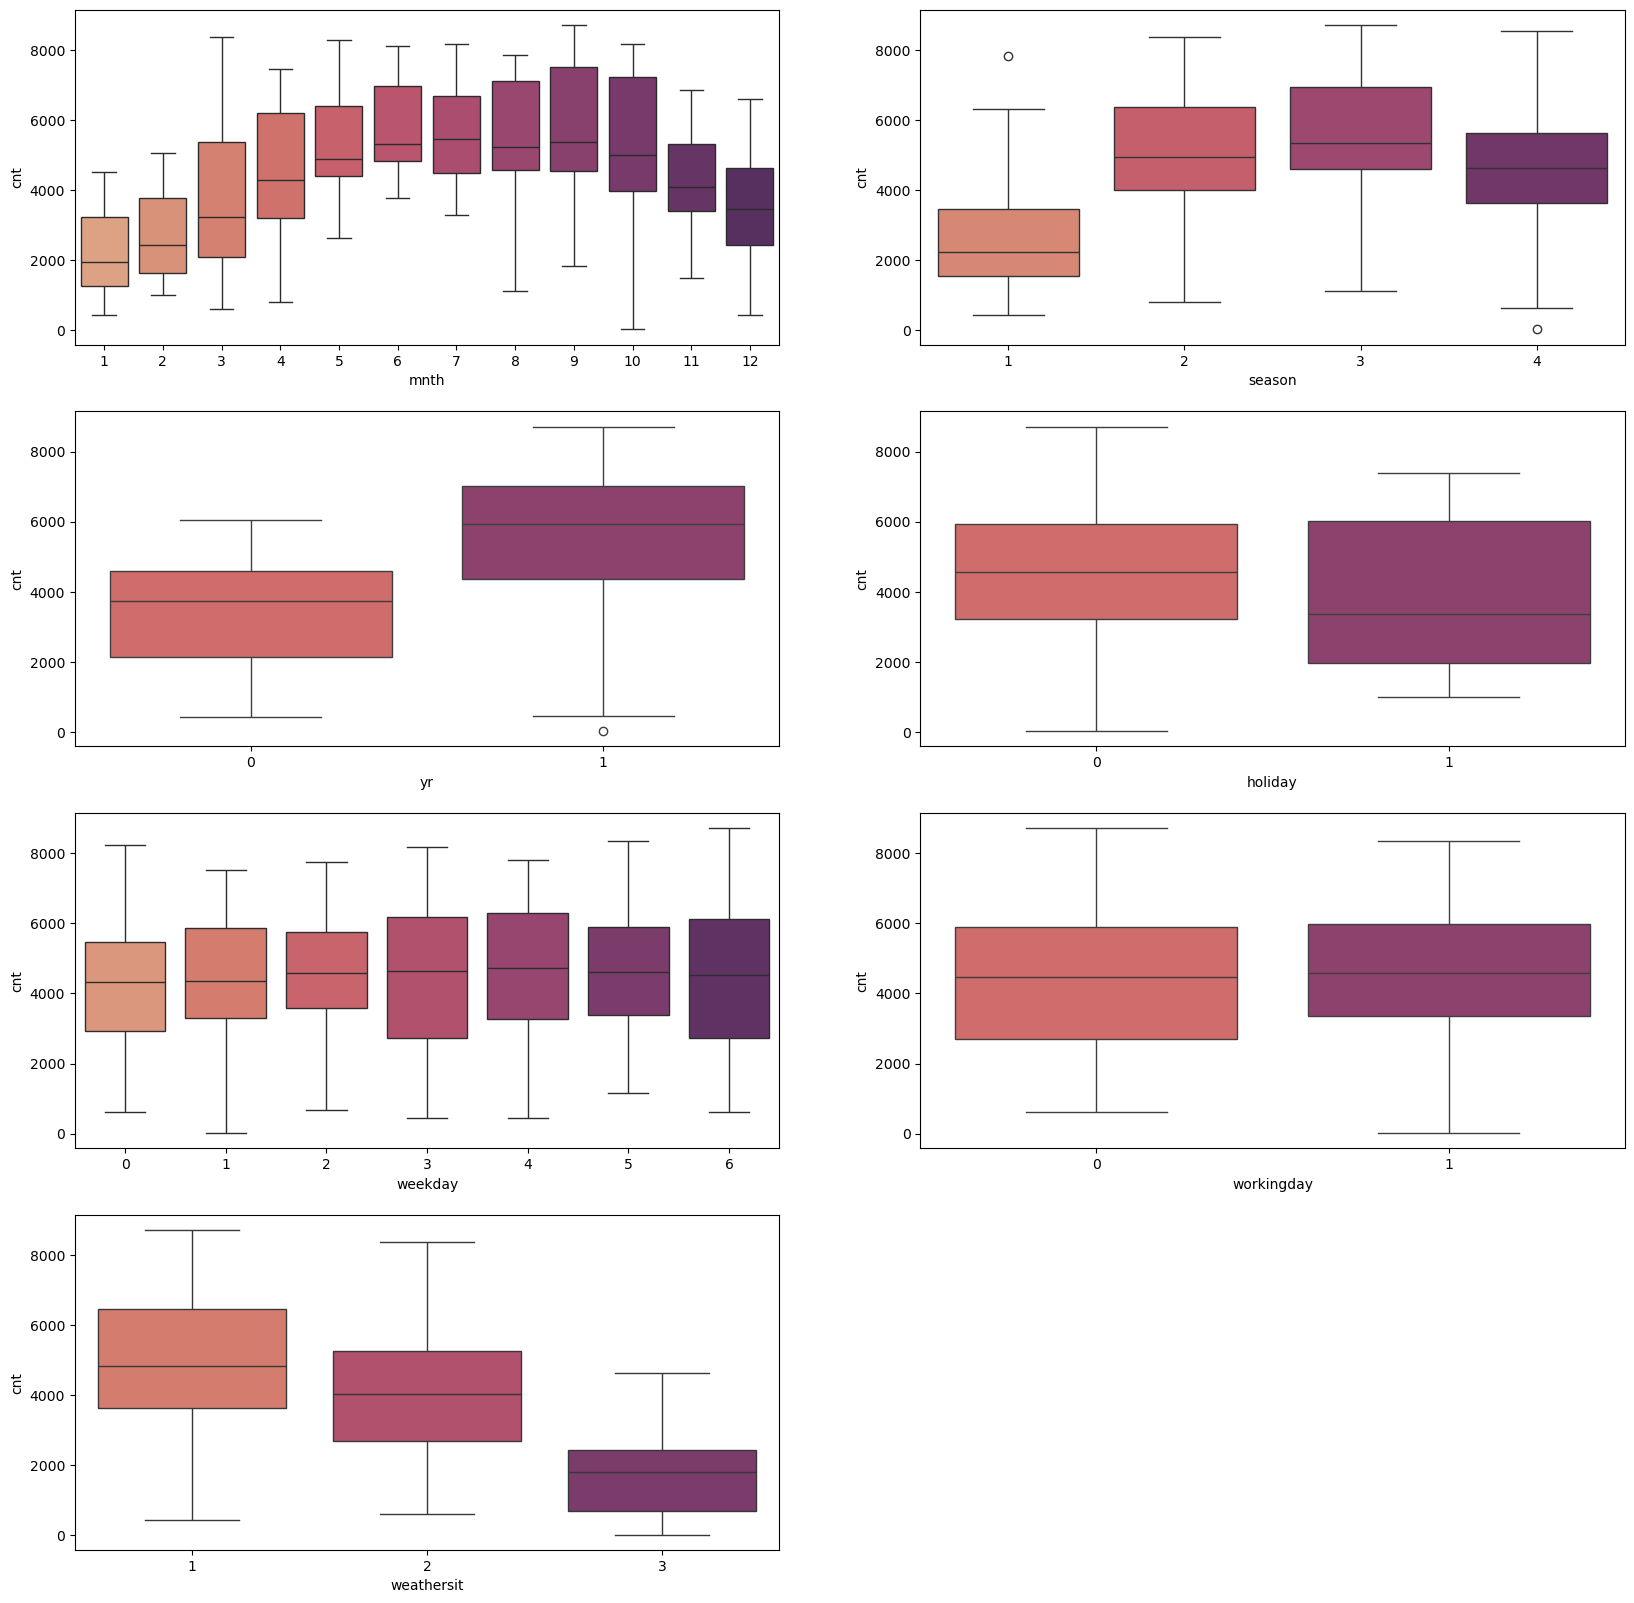

In [38]:
#cat_columns = ['mnth','season', 'yr', 'holiday', 'weekday','workingday', 'weathersit']

# Boxplots for categorical variables
plt.figure(figsize=(20, 20))
for i, col in enumerate(cat_columns):
    plt.subplot(4, 2, i + 1)
    sns.boxplot(data=bikes, x= col, y='cnt', palette = 'flare')
plt.show()

- Weekday:
    - There seems to be some variation in the median count across different weekdays, but it's less pronounced.
    - Weekday could still be included in the model, but it may have a weaker predictive power compared to other features.

- For the regression model:
    - Categorical variables like season, weathersit, month, weekday, etc., should be one-hot encoded or treated as categorical variables.
    - Interaction terms (such as season:workingday) might also be worth exploring.

In [40]:
df = df.drop(['holiday', 'weekday','workingday'], axis=1)

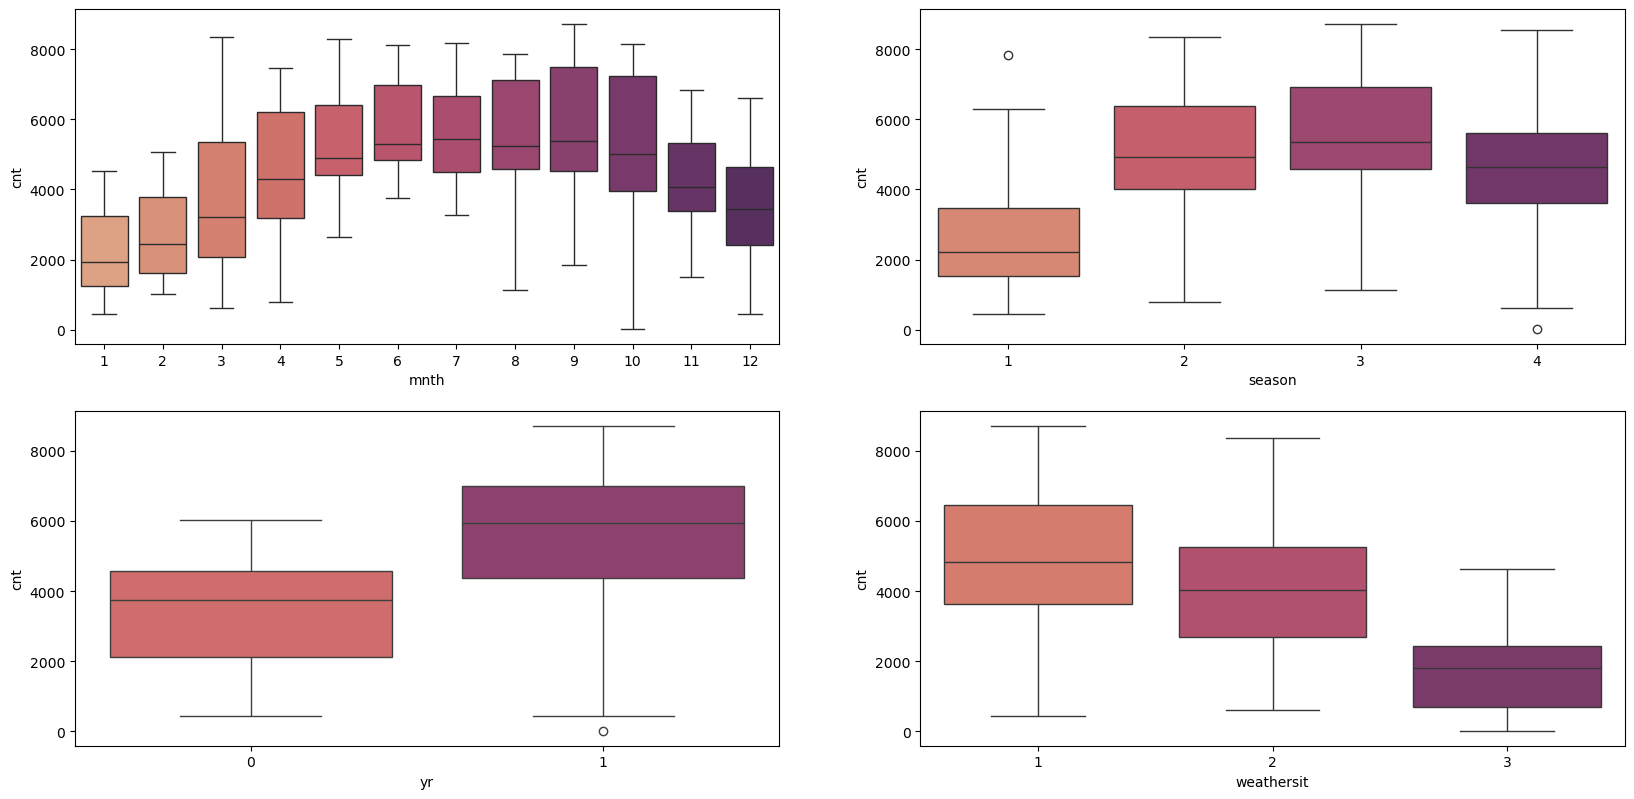

In [41]:
cat_columns = ['mnth','season', 'yr', 'weathersit']

# Boxplots for categorical variables
plt.figure(figsize=(20, 20))
for i, col in enumerate(cat_columns):
    plt.subplot(4, 2, i + 1)
    sns.boxplot(data=bikes, x= col, y='cnt', palette = 'flare')
plt.show()

#### ___Step 4.4 : Visualizing the correlation using a heat map.___

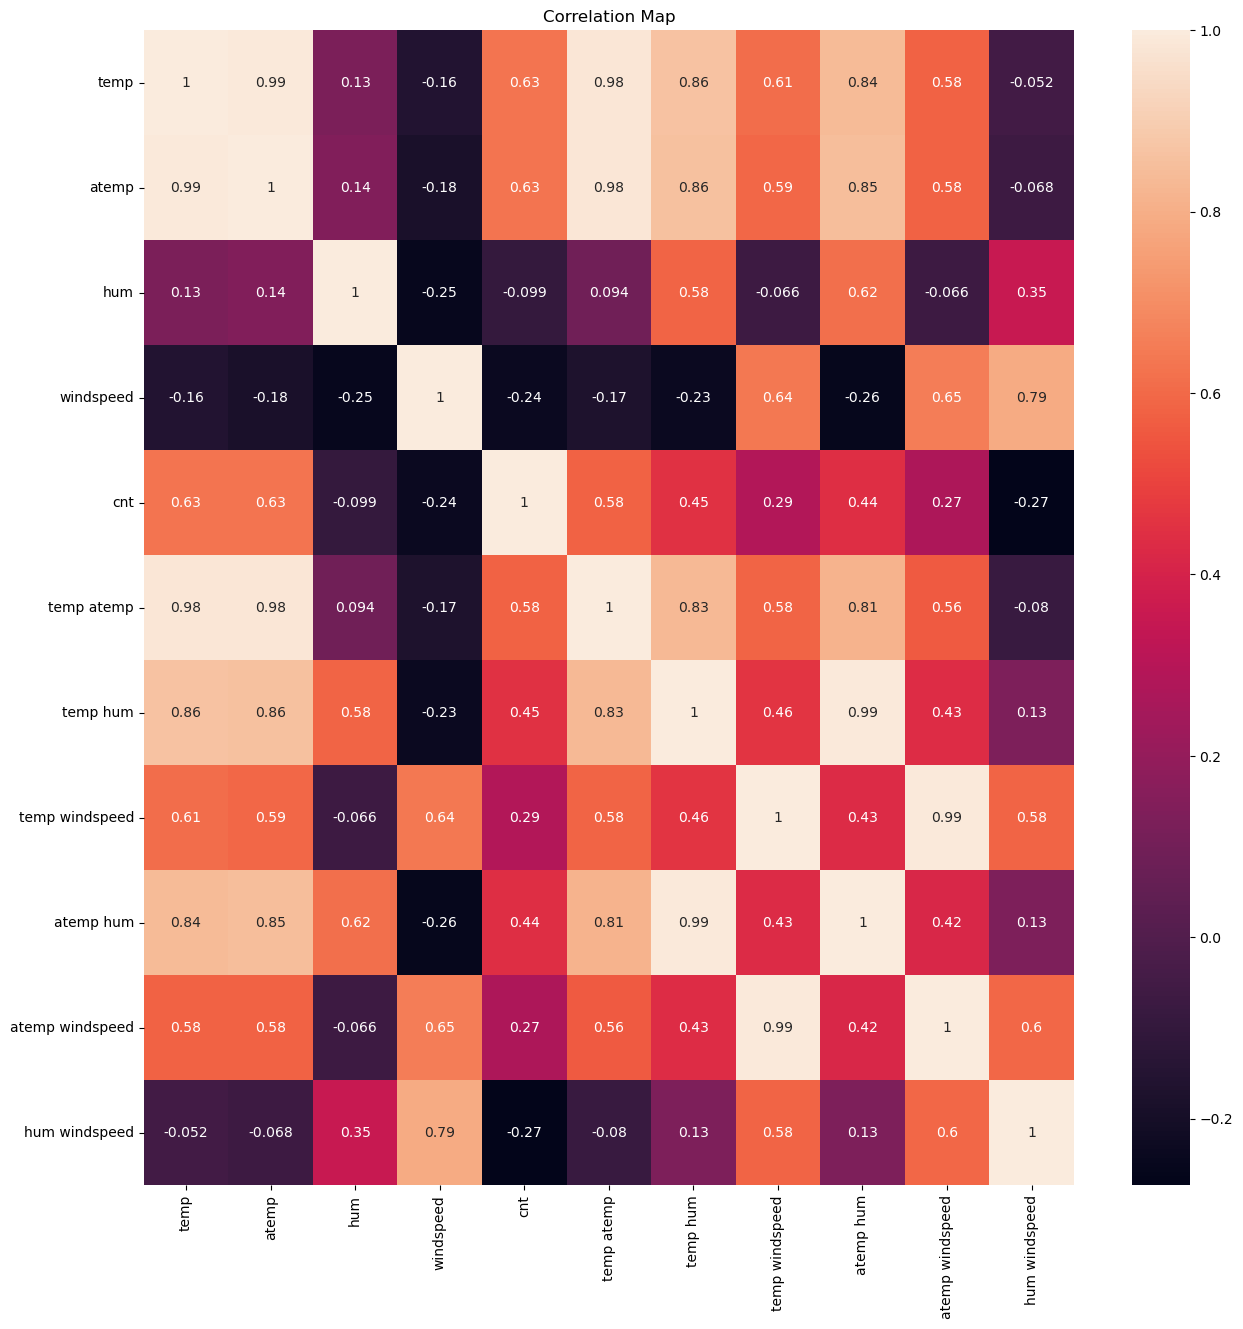

In [43]:
plt.figure(figsize = (15,15))

# Compute the correlation matrix
corr_matrix = df.corr()
sns.heatmap(corr_matrix, annot = True, cbar = True)
plt.title("Correlation Map")
plt.show()

#### ___Correlation matrix___

- We will take a different approach from using the correlation matrix. Instead, we will unstack the upper triangle and identify the top 10 factors with the highest positive correlation with "cnt" as well as the top 20 factors with the strongest negative correlation with "cnt."

#### ___Step 4.1 : Getting Dummy Variables for the Categorical Variables___

In [47]:
df_dummies = pd.get_dummies(df[['mnth','season', 'weathersit']], drop_first=True).astype('int')
df_dummies.nunique()

mnth_2          2
mnth_3          2
mnth_4          2
mnth_5          2
mnth_6          2
mnth_7          2
mnth_8          2
mnth_9          2
mnth_10         2
mnth_11         2
mnth_12         2
season_2        2
season_3        2
season_4        2
weathersit_2    2
weathersit_3    2
dtype: int64

In [48]:
dummy_cols = df_dummies.columns.tolist()
print(dummy_cols)

['mnth_2', 'mnth_3', 'mnth_4', 'mnth_5', 'mnth_6', 'mnth_7', 'mnth_8', 'mnth_9', 'mnth_10', 'mnth_11', 'mnth_12', 'season_2', 'season_3', 'season_4', 'weathersit_2', 'weathersit_3']


In [49]:
df.head()

,season,yr,mnth,weathersit,temp,atemp,hum,windspeed,cnt,temp atemp,temp hum,temp windspeed,atemp hum,atemp windspeed,hum windspeed
0,1,0,1,2,14.11,18.18,80.58,10.75,985,256.5198,1136.9838,151.6825,1464.9444,195.4350,866.2350
1,1,0,1,2,14.90,17.69,69.61,16.65,801,263.5810,1037.1890,248.0850,1231.4009,294.5385,1159.0065
2,1,0,1,1,8.05,9.47,43.73,16.64,1349,76.2335,352.0265,133.9520,414.1231,157.5808,727.6672
3,1,0,1,1,8.20,10.61,59.04,10.74,1562,87.0020,484.1280,88.0680,626.4144,113.9514,634.0896
4,1,0,1,1,9.31,11.46,43.70,12.52,1600,106.6926,406.8470,116.5612,500.8020,143.4792,547.1240


In [50]:
df_f = pd.concat([df, df_dummies], axis = 1)
df_f.head(3)

,season,yr,mnth,weathersit,temp,atemp,hum,windspeed,cnt,temp atemp,...,mnth_8,mnth_9,mnth_10,mnth_11,mnth_12,season_2,season_3,season_4,weathersit_2,weathersit_3
0,1,0,1,2,14.11,18.18,80.58,10.75,985,256.5198,...,0,0,0,0,0,0,0,0,1,0
1,1,0,1,2,14.90,17.69,69.61,16.65,801,263.5810,...,0,0,0,0,0,0,0,0,1,0
2,1,0,1,1,8.05,9.47,43.73,16.64,1349,76.2335,...,0,0,0,0,0,0,0,0,0,0


In [51]:
df_f.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 31 columns):
 #   Column           Non-Null Count  Dtype   
---  ------           --------------  -----   
 0   season           730 non-null    category
 1   yr               730 non-null    category
 2   mnth             730 non-null    category
 3   weathersit       730 non-null    category
 4   temp             730 non-null    float64 
 5   atemp            730 non-null    float64 
 6   hum              730 non-null    float64 
 7   windspeed        730 non-null    float64 
 8   cnt              730 non-null    int64   
 9   temp atemp       730 non-null    float64 
 10  temp hum         730 non-null    float64 
 11  temp windspeed   730 non-null    float64 
 12  atemp hum        730 non-null    float64 
 13  atemp windspeed  730 non-null    float64 
 14  hum windspeed    730 non-null    float64 
 15  mnth_2           730 non-null    int32   
 16  mnth_3           730 non-null    int32   
 1

#### ___Step 4.2 : Spliting data Set into Train Test Split___

In [53]:
df_train, df_test = train_test_split(df_f, train_size = 0.7, test_size = 0.3, random_state = 100)
print('Main DataFrame  - ',df_f.shape)
print('Train DataFrame - ',df_train.shape)
print('Test DataFrame  - ',df_test.shape)

Main DataFrame  -  (730, 31)
Train DataFrame -  (510, 31)
Test DataFrame  -  (219, 31)


In [54]:
df_train_x = df_train.drop('cnt',axis=1,inplace=False)
df_train_y = df_train['cnt']

In [55]:
print(df_train_x.shape)
print(df_train_y.shape)

(510, 30)
(510,)


In [56]:
df_test_x = df_test.drop('cnt',axis=1,inplace=False)
df_test_y = df_test['cnt']

In [57]:
print(df_test_x.shape)
print(df_test_y.shape)

(219, 30)
(219,)


#### ___Step 4.3 : Scaling with Min Max Scaling for Numerical Columns___

In [59]:
### Scaling with Min Max Scaling 
scaler = MinMaxScaler()

In [60]:
num_columns = get_numeric_columns(df_train_x)
num_columns

['temp',
 'atemp',
 'hum',
 'windspeed',
 'temp atemp',
 'temp hum',
 'temp windspeed',
 'atemp hum',
 'atemp windspeed',
 'hum windspeed']

In [61]:
df_train_x[num_columns] = scaler.fit_transform(df_train_x[num_columns])

In [62]:
df_train_x[num_columns].head(3)

,temp,atemp,hum,windspeed,temp atemp,temp hum,temp windspeed,atemp hum,atemp windspeed,hum windspeed
653,0.509875,0.501181,0.575330,0.300930,0.297956,0.438955,0.306522,0.476187,0.312586,0.312543
576,0.815254,0.766343,0.725680,0.264678,0.660740,0.843476,0.439574,0.863924,0.426415,0.357736
426,0.442419,0.438960,0.640148,0.255374,0.235040,0.431936,0.230516,0.475334,0.235320,0.307312


### ___Step 5 : Building a linear model___

#### ___Step 5.1 : Recursive Feature Elimination (RFE)___

In [107]:
# Apply PCA (keep components explaining 95% variance)
pca = PCA()  # Retain 95% of variance
X_train_pca = pca.fit_transform(df_train_x)

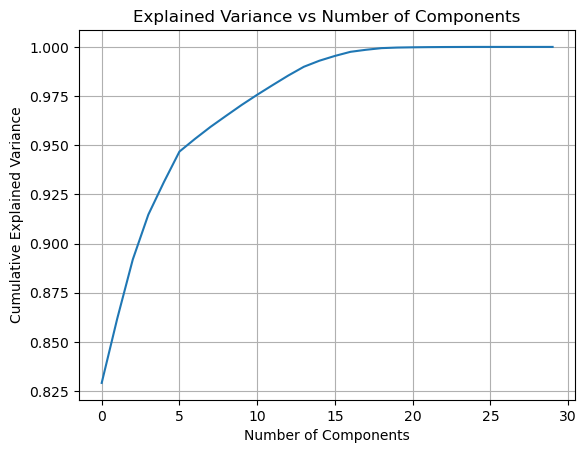

In [109]:
import matplotlib.pyplot as plt

plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Explained Variance vs Number of Components')
plt.grid()
plt.show()

In [111]:
# Apply PCA (keep components explaining 95% variance)
pca = PCA(20)  # Retain 95% of variance
X_train_pca = pca.fit_transform(df_train_x)

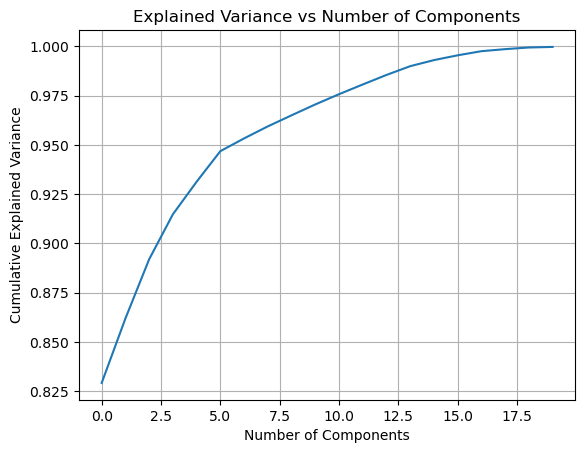

In [113]:
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Explained Variance vs Number of Components')
plt.grid()
plt.show()

In [86]:
import statsmodels.api as sm
import pandas as pd
from statsmodels.stats.outliers_influence import variance_inflation_factor

def run_ols_vif(X_train, y_train):
    """
    Runs an OLS regression model and calculates VIF for the given dataset.

    Parameters:
    X_train (DataFrame): Feature matrix for training.
    y_train (Series): Target variable.

    Returns:
    tuple: (Fitted OLS model, DataFrame of VIF values)
    """
    # Add a constant term for the intercept
    X_train_sm = sm.add_constant(X_train)

    # Fit the OLS model
    lr = sm.OLS(y_train, X_train_sm).fit()

    # Print model summary
    print(lr.summary())
    return lr, vif

# Example usage:
# model, vif_values = run_ols_vif(X_train, y_train)


In [115]:
ols_model= run_ols_vif(X_train_pca, df_train_y)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.839
Model:                            OLS   Adj. R-squared:                  0.833
Method:                 Least Squares   F-statistic:                     127.9
Date:                Sat, 22 Mar 2025   Prob (F-statistic):          1.20e-179
Time:                        18:18:27   Log-Likelihood:                -4120.8
No. Observations:                 510   AIC:                             8284.
Df Residuals:                     489   BIC:                             8372.
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       4486.3824     35.334    126.972      0.0

In [149]:
# Apply PCA (keep components explaining 95% variance)
pca = PCA(n_components=0.99)  # Retain 95% of variance
X_train_pca = pca.fit_transform(X_train_rfe)
X_test_pca = pca.transform(X_train_rfe)

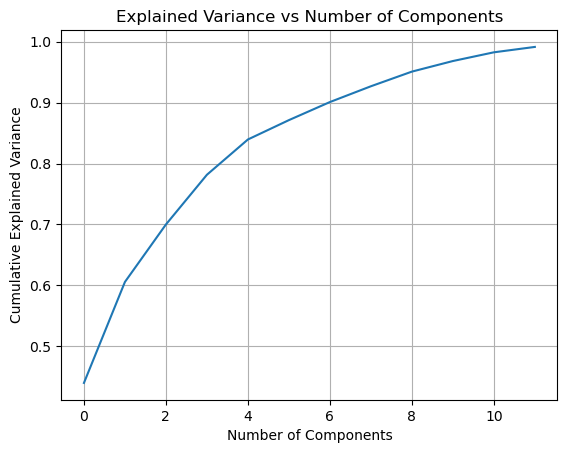

In [151]:
import matplotlib.pyplot as plt

plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Explained Variance vs Number of Components')
plt.grid()
plt.show()


In [153]:
ols_model= run_ols_vif(X_train_pca, df_train_y)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.821
Model:                            OLS   Adj. R-squared:                  0.816
Method:                 Least Squares   F-statistic:                     189.4
Date:                Sat, 22 Mar 2025   Prob (F-statistic):          1.22e-176
Time:                        18:20:30   Log-Likelihood:                -4149.2
No. Observations:                 510   AIC:                             8324.
Df Residuals:                     497   BIC:                             8379.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       4486.3824     37.055    121.072      0.0

In [155]:
# Apply PCA (keep components explaining 95% variance)
pca = PCA(n_components=17)  # Retain 95% of variance
X_train_pca = pca.fit_transform(X_train_rfe)
X_test_pca = pca.transform(X_train_rfe)

In [159]:
ols_model= run_ols_vif(X_train_pca, df_train_y)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.855
Model:                            OLS   Adj. R-squared:                  0.850
Method:                 Least Squares   F-statistic:                     170.6
Date:                Sat, 22 Mar 2025   Prob (F-statistic):          1.10e-193
Time:                        18:22:42   Log-Likelihood:                -4094.9
No. Observations:                 510   AIC:                             8226.
Df Residuals:                     492   BIC:                             8302.
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       4486.3824     33.482    133.993      0.0

In [ ]:
# Ridgid 

In [185]:
from sklearn.linear_model import Ridge, Lasso
# Add a constant term for the intercept
ridge = Ridge(alpha=0.1)
# Fit the OLS model
lr = ridge.fit(X_train_pca, df_train_y)


In [183]:
# Model performance
print("Ridge Regression Coefficients:", ridge.coef_)
print("Ridge R^2 Score:", ridge.score(X_train_pca, df_train_y))

Ridge Regression Coefficients: [  677.73398839  -879.13528573  2488.66900062   953.14214501
  -178.06154875 -1236.82008549   574.65677239   274.42635134
   247.59247469    29.07314668   416.42372427   -26.27056563
 -1187.57500173  2358.19680111   562.09470379  5328.48250182
 -7155.70321226]
Ridge R^2 Score: 0.8536453809218065


In [243]:
# Add a constant term for the intercept
lasso = Lasso(alpha=1)
# Fit the OLS model
lr_2 = lasso.fit(X_train_pca, df_train_y)

In [245]:
# Model performance
print("Lasso Regression Coefficients:", lasso.coef_)
print("Lasso R^2 Score:", lasso.score(X_train_pca, df_train_y))

Lasso Regression Coefficients: [  677.06617007  -877.44662915  2486.83262845   949.77227848
  -172.42283332 -1228.75629123   564.53464485   262.07283895
   234.20904909     9.71788976   394.71343836    -0.
 -1148.74316156  2144.75874177     0.          5390.46780978
 -7868.27282736]
Lasso R^2 Score: 0.8538749603148332


In [213]:
df.head(2)

,season,yr,mnth,weathersit,temp,hum,windspeed,cnt,temp hum,temp windspeed,hum windspeed
0,1,0,1,2,14.11,80.58,10.75,985,1136.9838,151.6825,866.2350
1,1,0,1,2,14.90,69.61,16.65,801,1037.1890,248.0850,1159.0065


In [223]:
df_X = df.drop('cnt', axis = 1, inplace = False)
dy_y = df['cnt']

In [226]:
X_train, X_test, y_train, y_test = train_test_split(df_X, dy_y, test_size=0.2, random_state=42)

#### ___Step 5.3 : Residual Analysis of the train data___

- So, now to check if the error terms are also normally distributed (which is infact, one of the major assumptions of linear regression), let us plot the histogram of the error terms and see what it looks like.

In [182]:
y_train_pred = lr.predict(X_train_rfe_sm)

Text(0.5, 0, 'Errors')

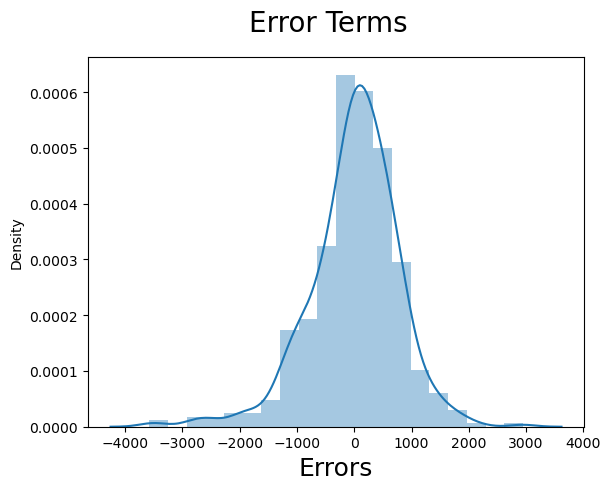

In [184]:
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((y_train - y_train_pred), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)                         # X-label

### ___Step 5 : Making Predictions___

#### ___Step 5.1 : Scaling and transforming the Numerical Values in Test DataFrame___

In [188]:
num_columns

['temp', 'hum', 'windspeed', 'temp hum', 'temp windspeed', 'hum windspeed']

In [192]:
# Transforming the numerical values in the test dataframe.

df_test[num_columns] = scaler.transform(df_test[num_columns])
df_test.head(3)

,season,yr,mnth,weathersit,temp,hum,windspeed,temp hum,temp windspeed,hum windspeed,...,mnth_8,mnth_9,mnth_10,mnth_11,mnth_12,season_2,season_3,season_4,weathersit_2,weathersit_3
184,3,0,7,2,0.831662,0.657358,0.084376,0.778169,0.200004,0.159688,...,0,0,0,0,0,0,1,0,1,0
535,2,1,6,1,0.901246,0.610161,0.153994,0.777822,0.321865,0.207131,...,0,0,0,0,0,1,0,0,0,0
299,4,0,10,2,0.512002,0.837696,0.334296,0.641460,0.337531,0.493832,...,0,0,1,0,0,0,0,1,1,0


#### ___Step 5.1 : Spliting data Set into Train Test Split___

In [195]:
y_test.head(3)

184    6043
535    6211
299    2659
Name: cnt, dtype: int64

#### ___Step 5.2 : Let's use our model to make predictions.___

In [198]:
# Adding Constant
X_test_sm = sm.add_constant(X_test)

In [200]:
X_train_rfe_col = X_train_rfe.columns.tolist()

In [202]:
X_train_rfe_col

['const',
 'season',
 'yr',
 'windspeed',
 'mnth_9',
 'season_2',
 'season_3',
 'weathersit_3']

In [204]:
X_test_sm = X_test_sm[X_train_rfe_col]

In [206]:
y_test_pred = lr.predict(X_test_sm)

ValueError: shapes (219,8) and (15,) not aligned: 8 (dim 1) != 15 (dim 0)

In [ ]:
# Plotting y_test and y_pred to understand the spread

fig = plt.figure()
plt.scatter(y_test, y_test_pred)
fig.suptitle('y_test vs y_pred', fontsize = 20)              # Plot heading 
plt.xlabel('y_test', fontsize = 18)                          # X-label
plt.ylabel('y_pred', fontsize = 16)      

In [201]:
# Evaluate the model
from sklearn.metrics import r2_score
r2_score(y_true = y_test, y_pred = y_test_pred)

0.784928831783892